#  <span style="color:BLUE">IMPORTACIÓN DE LIBRERIAS</span>

In [ ]:
import tarfile
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
import matplotlib.pyplot as plt
import numpy as np
from time import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,Conv3D,MaxPool2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import CSVLogger
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

#  <span style="color:BLUE">CARGA DEL DATASET (50000K DE IMÁGENES)</span>

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Set numeric type to float32 from uint8
#x_train = x_train.astype('float32')
#x_test = x_test.astype('float32')
#x_train /= 255
#x_test /= 255



170500096/170498071 [==============================] - 4s 0us/step


#  <span style="color:BLUE">NORMALIZACIÓN DEL DATASET (MEAN)</span>

In [ ]:
mean=np.mean(x_train, axis=(0,1,2,3))
std=np.std(x_train, axis=(0,1,2,3))
x_train =(x_train)/(std+1e-7)
x_test =(x_test)/(std+1e-7)

#  <span style="color:BLUE">CREACIÓN DEL MODELO</span>


In [ ]:
# except Exception as e:
model = Sequential()

#Layer 1 
model.add( Conv2D(48, kernel_size=(3,3),strides=(1,1), activation='relu', padding='same', input_shape=x_train.shape[1:] ) )
model.add( MaxPool2D(pool_size=(2,2),strides=(2,2)) )

#Layer 2
model.add( Conv2D(96, kernel_size=(3,3), activation='relu', padding='same') )
model.add( MaxPool2D(pool_size=(2,2),strides=(2,2)) )

#Layer 3
model.add( Conv2D(192, kernel_size=(3,3), activation='relu', padding='same') )


#Layer 4
model.add( Conv2D(192, kernel_size=(3,3), activation='relu', padding='same') )
model.add( MaxPool2D(pool_size=(2,2),strides=(2,2)) )

#Layer 5
model.add( Conv2D(256, kernel_size=(3,3), activation='relu', padding='same') )
model.add( MaxPool2D(pool_size=(2,2),strides=(2,2)) )

model.add(Flatten())

#Layer 6
model.add(Dense(512, activation='tanh'))

#Layer 7 
model.add(Dense(256, activation='tanh'))

#Prediction
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#  <span style="color:BLUE">ENTRENAMIENTO DEL MODELO</span>

In [ ]:
start_time = time()
history = model.fit(x_train, y_train, batch_size= 128, epochs=10 , validation_data=(x_test, y_test), verbose=1)
elapsed_time = time() - start_time
print("Elapsed time: %.10f seconds." % elapsed_time)

Epoch 1/10
391/391 [==============================] - 6s 14ms/step - loss: 1.5593 - accuracy: 0.4208 - val_loss: 1.3181 - val_accuracy: 0.5330
Epoch 2/10
391/391 [==============================] - 5s 13ms/step - loss: 1.0217 - accuracy: 0.6338 - val_loss: 0.9175 - val_accuracy: 0.6796
Epoch 3/10
391/391 [==============================] - 5s 13ms/step - loss: 0.8196 - accuracy: 0.7116 - val_loss: 0.7896 - val_accuracy: 0.7277
Epoch 4/10
391/391 [==============================] - 5s 13ms/step - loss: 0.6679 - accuracy: 0.7653 - val_loss: 0.7902 - val_accuracy: 0.7267
Epoch 5/10
391/391 [==============================] - 5s 13ms/step - loss: 0.5578 - accuracy: 0.8046 - val_loss: 0.7411 - val_accuracy: 0.7498
Epoch 6/10
391/391 [==============================] - 5s 13ms/step - loss: 0.4694 - accuracy: 0.8360 - val_loss: 0.8147 - val_accuracy: 0.7385
Epoch 7/10
391/391 [==============================] - 5s 13ms/step - loss: 0.3954 - accuracy: 0.8615 - val_loss: 0.8567 - val_accuracy: 0.7437

#  <span style="color:BLUE">RESULTADOS DE LA EVALUACIÓN</span>

In [ ]:
test_score = model.evaluate(x_test, y_test)
print('Test loss {:.4f}, accuracy {:.2f}%'.format(test_score[0], test_score[1] * 100))

313/313 [==============================] - 1s 3ms/step - loss: 0.9614 - accuracy: 0.7511
Test loss 0.9614, accuracy 75.11%


#  <span style="color:BLUE">GRÁFICA DE LA EVALUACIÓN Y ENTRENAMIENTO ACC</span>

[0.5329999923706055, 0.6796000003814697, 0.7276999950408936, 0.7267000079154968, 0.7498000264167786, 0.7384999990463257, 0.7437000274658203, 0.7404999732971191, 0.7365999817848206, 0.7511000037193298]


Text(0, 0.5, 'acc')

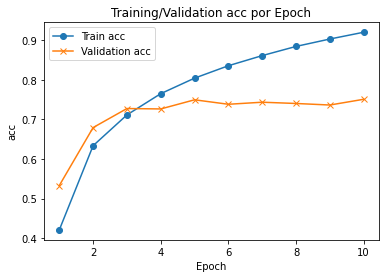

In [ ]:
f, ax = plt.subplots()
print(history.history['val_accuracy'])
ax.plot([None] + history.history['accuracy'], 'o-')
ax.plot([None] + history.history['val_accuracy'],'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc por Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

Text(0, 0.5, 'Loss')

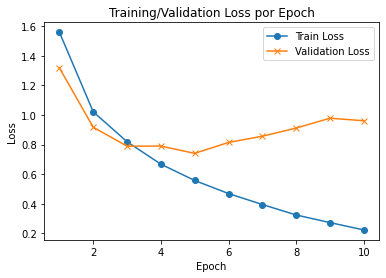

In [ ]:
f, ax = plt.subplots()
ax.plot([None] + history.history['loss'], 'o-')
ax.plot([None] + history.history['val_loss'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train Loss', 'Validation Loss'], loc = 0)
ax.set_title('Training/Validation Loss por Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')